# Machine Learning - PreProcessing
# This notebook prepares the data for an artificial recurrent neural network called Long Short Term Memory (LSTM) using the past 60 days stock price of (Apple Inc)

In [2]:
# Initial imports
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
# Get the stock data using yahoo source
df_AAPL = web.DataReader(['AAPL'], data_source='yahoo', start='2016-01-01', end='2021-01-15')
df_AAPL

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2016-01-04,24.400942,26.337500,26.342501,25.500000,25.652500,270597600.0
2016-01-05,23.789471,25.677500,26.462500,25.602501,26.437500,223164000.0
2016-01-06,23.323915,25.174999,25.592501,24.967501,25.139999,273829600.0
2016-01-07,22.339539,24.112499,25.032499,24.107500,24.670000,324377600.0
2016-01-08,22.457672,24.240000,24.777500,24.190001,24.637501,283192000.0
...,...,...,...,...,...,...
2021-01-11,128.979996,128.979996,130.169998,128.500000,129.190002,100620900.0
2021-01-12,128.800003,128.800003,129.690002,126.860001,128.500000,91951100.0


<function matplotlib.pyplot.show(*args, **kw)>

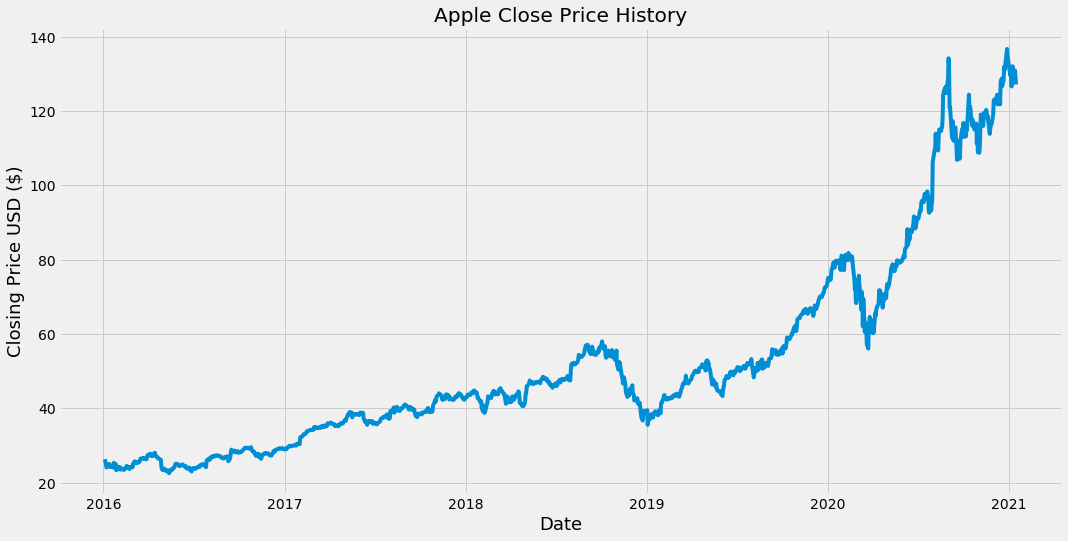

In [4]:
# Visualize the closing price
plt.figure(figsize=(16,8))
plt.title('Apple Close Price History')
plt.plot(df_AAPL['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price USD ($)', fontsize=18)
plt.show

In [5]:
df_AAPL.shape

(1269, 6)

In [8]:
# Create a new dataframe with only the 'Close Column'
data = df_AAPL['Close']['AAPL']

# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .8 )

training_data_len

1016

In [9]:
# Scale the Data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

ValueError: Expected 2D array, got 1D array instead:
array=[ 26.33749962  25.67749977  25.17499924 ... 130.88999939 128.91000366
 127.13999939].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.